In [1]:
import numpy as np
%matplotlib inline
import matplotlib.pyplot as plt
import networkx as nx

# Connected?

In [2]:
N = 500 # number of vertices
TRIALS = 100 # number of networks to average over
N_PROBS = 100 # number of probabilities to try
connected = np.zeros(N_PROBS) # 
i = 0
probs = np.linspace(0, 5*np.log(N)/N, N_PROBS)
for p in probs:
    for j in range(TRIALS):
        g = nx.fast_gnp_random_graph(N, p)
        if len(sorted(nx.connected_components(g), key = len, reverse=True)) == 1:
            connected[i] = connected[i] + 1
    connected[i] = connected[i]/float(TRIALS)
    i = i + 1

([<matplotlib.axis.XTick at 0x7f761f000450>,
 <a list of 3 Text xticklabel objects>)

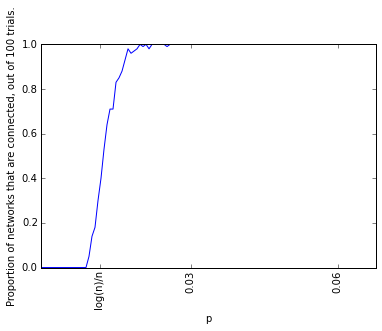

In [46]:
fig, ax = plt.subplots(1,1)
p=ax.plot(probs, connected)
plt.xlabel('p')
plt.ylabel('Proportion of networks that are connected, out of 100 trials.')

plt.xticks([np.log(N)/N, probs[len(probs)/2], probs[-1]], ['log(N)/N', str(probs[len(probs)/2])[:4], str(probs[-1])[:4]], rotation='vertical')

# Giant Component

In [12]:
n=5000
g_comp = np.zeros(100)
i = 0
probs = np.linspace(0, 1.1/n, 100)
for p in probs:
    g = nx.fast_gnp_random_graph(n, p)
    g_comp[i] = len(sorted(nx.connected_components(g), key = len, reverse=True)[0])
    i = i + 1

([<matplotlib.axis.YTick at 0x7febfae543d0>,
 <a list of 3 Text yticklabel objects>)

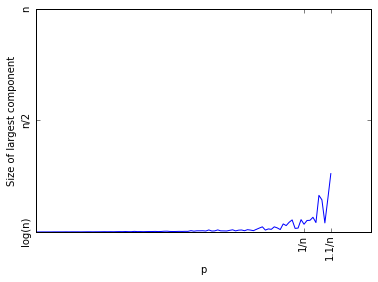

In [14]:
fig, ax = plt.subplots(1,1)
p=ax.plot(probs, g_comp)

plt.xlabel('p')
plt.ylabel('Size of largest component')


x = plt.xticks()[0] + [1.0/n]

y = plt.xticks()[0] + [1.0/n]

#plt.xticks([1.0/n, 2.0/n, 3.0/n, 4.0/n, 0.001, 0.0015, probs[-1]], ['1/n', '2/n', '3/n', '4/n', 0.001, 0.0015, str(probs[-1])], rotation='vertical')
plt.xticks([1.0/n, 1.1/n], ['1/n', '1.1/n'], rotation='vertical')
plt.yticks([np.log(n), n/2.0, n], ['log(n)', 'n/2', 'n'], rotation='vertical')

#xt = ax.get_xticks() 
#xt=np.append(xt,1.0/n)
#xtl=xt.tolist()
#xtl[-1]="1/n"
#ax.set_xticks(xt)
#ax.set_xticklabels(xtl)